In [ ]:
import numpy as np
import pandas as pd

In [ ]:
pf = pd.read_csv('Churn_Modelling.csv')
pf.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
pf.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
pf.duplicated().sum() #afficher le nombre de doublon

0

In [ ]:
pf['Exited'].value_counts()# COMPTER LE NOMBRE DE VARIABLE


,count
Exited,
0,7963
1,2037


In [ ]:
pf.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
pf.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3130,795,Spain,Female,56,5,0.0,1,1,0,35418.69,1


In [ ]:
pf = pd.get_dummies(pf,columns=['Geography','Gender'],drop_first=True).astype(int)

In [ ]:
x = pf.drop('Exited',axis=1)
y = pf['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [ ]:
x_train_scaled

array([[ 1.27754581, -1.23264342, -0.012743  , ..., -0.58408625,
        -0.57138416, -1.0862028 ],
       [-0.49959477,  0.28410615,  0.33282985, ...,  1.71207591,
        -0.57138416, -1.0862028 ],
       [ 0.67827747, -0.09508124, -1.39503438, ..., -0.58408625,
        -0.57138416, -1.0862028 ],
       ...,
       [ 2.06279398, -0.28467494, -0.70388869, ..., -0.58408625,
        -0.57138416,  0.9206384 ],
       [-1.02653762,  1.42166833, -0.012743  , ...,  1.71207591,
        -0.57138416,  0.9206384 ],
       [ 0.03768029, -1.04304972,  0.67840269, ..., -0.58408625,
        -0.57138416, -1.0862028 ]])

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 50)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6731 - loss: 0.6019 - val_accuracy: 0.8450 - val_loss: 0.3793
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8311 - loss: 0.3991 - val_accuracy: 0.8625 - val_loss: 0.3417
Epoch 3/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8468 - loss: 0.3790 - val_accuracy: 0.8650 - val_loss: 0.3257
Epoch 4/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8551 - loss: 0.3518 - val_accuracy: 0.8625 - val_loss: 0.3157
Epoch 5/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8578 - loss: 0.3412 - val_accuracy: 0.8675 - val_loss: 0.3201
Epoch 6/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8647 - loss: 0.3371 - val_accuracy: 0.8612 - val_loss: 0.3195
Epoch 7/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8661 - loss: 0.3289 - val_accuracy: 0.8625 - val_loss: 0.3184
Epoch 8/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8569 - loss: 0.3425 - val_accuracy: 0.

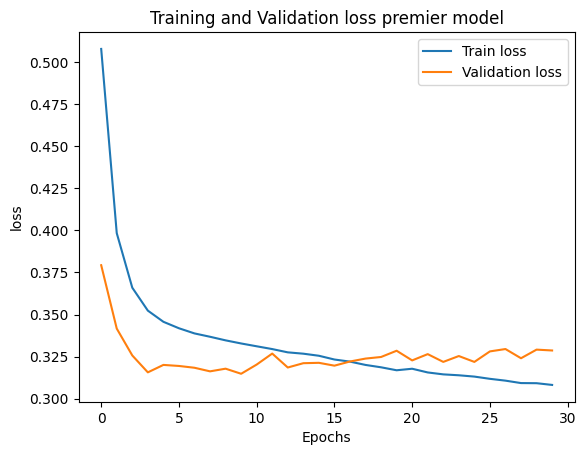

In [ ]:
## test sur le premier methode
#  crée un modèle pour entrainer et tester sur mes donnée

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Define the model
model = keras.Sequential([
    layers.Dense(50, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    layers.Dense(10, activation='relu'),

    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train the model
history =model.fit(x_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.1)


# Evaluate the model
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


# Make predictions
y_pred = model.predict(x_test_scaled)
y_pred = (y_pred > 0.5).astype(int) # Convert probabilities to binary predictions

# Example: Print the first 10 predictions and true labels
for i in range(10):
  print(f"Prediction: {y_pred[i][0]}, True Label: {y_test.iloc[i]}")

# Récupérer les valeurs d'exactitude d'entraînement et de validation depuis l'objet History
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Créer un graphique pour montrer l'exactitude d'entraînement et de validation au fil des époques
plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and Validation loss premier model')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 50)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6756 - loss: 0.8885 - val_accuracy: 0.8288 - val_loss: 0.5718
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8058 - loss: 0.5773 - val_accuracy: 0.8475 - val_loss: 0.4686
Epoch 3/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8282 - loss: 0.4921 - val_accuracy: 0.8550 - val_loss: 0.4167
Epoch 4/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8389 - loss: 0.4430 - val_accuracy: 0.8612 - val_loss: 0.3903
Epoch 5/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8484 - loss: 0.4260 - val_accuracy: 0.8625 - val_loss: 0.3722
Epoch 6/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8599 - loss: 0.3983 - val_accuracy: 0.8650 - val_loss: 0.3674
Epoch 7/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8453 - loss: 0.4230 - val_accuracy: 0.8700 - val_loss: 0.3607
Epoch 8/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8575 - loss: 0.3973 - val_accuracy: 0.

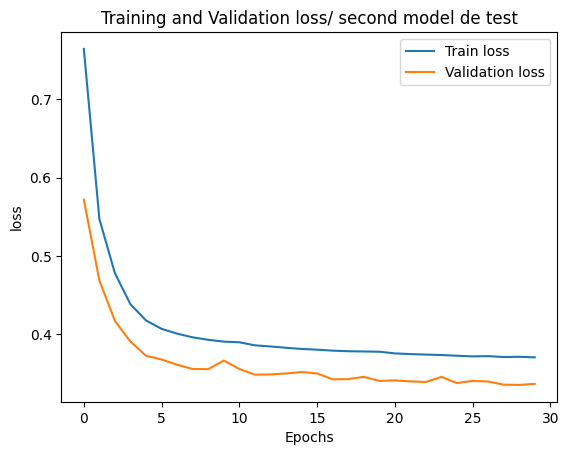

In [ ]:
## test sur le deuxieme methode

#  crée un modèle pour entrainer et tester sur mes donnée

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Define the model
from tensorflow.keras import regularizers

model2 = keras.Sequential([
  layers.Dense(50, activation='relu', input_shape=(x_train_scaled.shape[1],), kernel_regularizer=regularizers.l2(0.01)),
  layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  layers.Dense(1, activation='sigmoid')
])


# Compile the model
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model2.summary()

# Train the model
history =model2.fit(x_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.1)


# Evaluate the model
loss, accuracy = model2.evaluate(x_test_scaled, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


# Make predictions
y_pred = model2.predict(x_test_scaled)
y_pred = (y_pred > 0.5).astype(int) # Convert probabilities to binary predictions

# Example: Print the first 10 predictions and true labels
for i in range(10):
  print(f"Prediction: {y_pred[i][0]}, True Label: {y_test.iloc[i]}")

# Récupérer les valeurs d'exactitude d'entraînement et de validation depuis l'objet History
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Créer un graphique pour montrer l'exactitude d'entraînement et de validation au fil des époques
plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Training and Validation loss/ second model de test')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#pf['Geography'].value_counts()# COMPTER LE NOMBRE DE VARIABLE


In [ ]:
pf.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
9995,771,39,5,0,2,1,0,96270,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,0,1
9999,792,28,4,130142,1,1,0,38190,0,0,0,0


In [ ]:
model.save('test_model.keras')


In [ ]:
model2.save('test_model2.keras')


In [ ]:
from google.colab import files
files.download('test_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('test_model2.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
loaded_model = tf.keras.models.load_model('test_model.keras')


In [ ]:
loaded_model2 = tf.keras.models.load_model('test_model2.keras')


In [ ]:
y_pred2 = loaded_model2.predict(x_test_scaled)
y_pred2

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.15293935],
       [0.56113267],
       [0.3725398 ],
       ...,
       [0.70085967],
       [0.09414436],
       [0.23838943]], dtype=float32)

In [ ]:
y_pred2 = (y_pred2 > 0.6).astype(int) # Convert probabilities to binary predictions
y_pred2

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
y_pred = loaded_model.predict(x_test_scaled)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.10878901],
       [0.51548505],
       [0.13899581],
       ...,
       [0.6901533 ],
       [0.08343306],
       [0.21409504]], dtype=float32)

In [ ]:
y_pred = (y_pred > 0.6).astype(int) # Convert probabilities to binary predictions
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
#parametre du second model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)
accuracy,precision,recall,f1

(0.859, 0.821656050955414, 0.3368146214099217, 0.4777777777777778)

In [ ]:
#parametre du premier model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy,precision,recall,f1

(0.858, 0.7564766839378239, 0.381201044386423, 0.5069444444444444)

In [ ]:
model.save('test_model.keras')
from google.colab import files
files.download('test_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## OPTIMISATION DE LA PRECISION DE L'ALGO